In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/ESS_practice_data/ESSdata_Thinkful.csv')
data.head()

,cntry,idno,year,tvtot,ppltrst,pplfair,pplhlp,happy,sclmeet,sclact,gndr,agea,partner
0,CH,5.0,6,3.0,3.0,10.0,5.0,8.0,5.0,4.0,2.0,60.0,1.0
1,CH,25.0,6,6.0,5.0,7.0,5.0,9.0,3.0,2.0,2.0,59.0,1.0
2,CH,26.0,6,1.0,8.0,8.0,8.0,7.0,6.0,3.0,1.0,24.0,2.0
3,CH,28.0,6,4.0,6.0,6.0,7.0,10.0,6.0,2.0,2.0,64.0,1.0
4,CH,29.0,6,5.0,6.0,7.0,5.0,8.0,7.0,2.0,2.0,55.0,1.0


In [3]:
data.fillna(data.mean(), inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8594 entries, 0 to 8593
Data columns (total 13 columns):
cntry      8594 non-null object
idno       8594 non-null float64
year       8594 non-null int64
tvtot      8594 non-null float64
ppltrst    8594 non-null float64
pplfair    8594 non-null float64
pplhlp     8594 non-null float64
happy      8594 non-null float64
sclmeet    8594 non-null float64
sclact     8594 non-null float64
gndr       8594 non-null float64
agea       8594 non-null float64
partner    8594 non-null float64
dtypes: float64(11), int64(1), object(1)
memory usage: 872.9+ KB


In [4]:
data['cntry'].unique()

array(['CH', 'CZ', 'DE', 'ES', 'NO', 'SE'], dtype=object)

### 1. Did people become less trusting from 2012 to 2014? Compute results for each country in the sample.

(array([ 271.,  170.,  440.,  715.,  767., 1711., 1098., 1639., 1299.,
         484.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

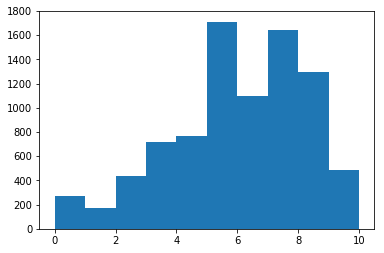

In [5]:
plt.hist(data['ppltrst'])

In [6]:
trust = data.groupby(['cntry', 'year'])
trust['ppltrst'].mean()

cntry  year
CH     6       5.677878
       7       5.751617
CZ     6       4.375257
       7       4.426383
DE     6       5.214286
       7       5.357143
ES     6       5.114592
       7       4.896224
NO     6       6.647825
       7       6.597209
SE     6       6.057401
       7       6.257709
Name: ppltrst, dtype: float64

In [7]:
#Switzerland
CH = data[data['cntry']=='CH']
CH6 = CH[CH['year']==6]
CH7 = CH[CH['year']==7]
print("Switzerland:", stats.ttest_ind(CH6['ppltrst'], CH7['ppltrst']))

#Czech Republic
CZ = data[data['cntry']=='CZ']
CZ6 = CZ[CZ['year']==6]
CZ7 = CZ[CZ['year']==7]
print("Czech Republic:", stats.ttest_ind(CZ6['ppltrst'], CZ7['ppltrst']))

#Germany
DE = data[data['cntry']=='DE']
DE6 = DE[DE['year']==6]
DE7 = DE[DE['year']==7]
print("Germany:", stats.ttest_ind(DE6['ppltrst'], DE7['ppltrst']))

#Spain
ES = data[data['cntry']=='ES']
ES6 = ES[ES['year']==6]
ES7 = ES[ES['year']==7]
print("Spain:", stats.ttest_ind(ES6['ppltrst'], ES7['ppltrst']))

#Norway
NO = data[data['cntry']=='NO']
NO6 = NO[NO['year']==6]
NO7 = NO[NO['year']==7]
print("Norway:", stats.ttest_ind(NO6['ppltrst'], NO7['ppltrst']))

#Sweden
SE = data[data['cntry']=='SE']
SE6 = SE[SE['year']==6]
SE7 = SE[SE['year']==7]
print("Sweden:", stats.ttest_ind(SE6['ppltrst'], SE7['ppltrst']))

Switzerland: Ttest_indResult(statistic=-0.6782716584661505, pvalue=0.49770110247151234)
Czech Republic: Ttest_indResult(statistic=-0.39418543261711414, pvalue=0.6935081020969057)
Germany: Ttest_indResult(statistic=-0.18084358577434545, pvalue=0.8578926631223287)
Spain: Ttest_indResult(statistic=2.4837720623641446, pvalue=0.013067001200379165)
Norway: Ttest_indResult(statistic=0.5436344941028719, pvalue=0.5867760147589384)
Sweden: Ttest_indResult(statistic=-2.1029309554508333, pvalue=0.03560925311628811)


It appears that the change in trust only reached statistical significance in Spain and Sweden. The rest of the countries were mixed but none reached significance. 

### 2. Did people become happier from 2012 to 2014? Compute results for each country in the sample.

(array([  29.,   22.,   57.,  125.,  174.,  607.,  612., 1555., 2543.,
        2870.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

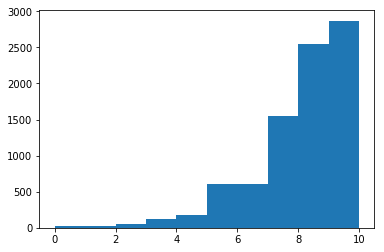

In [8]:
plt.hist(data['happy'])

In [9]:
happy = data.groupby(['cntry', 'year'])
happy['happy'].mean()

cntry  year
CH     6       8.086784
       7       8.116429
CZ     6       6.787744
       7       6.921228
DE     6       7.428571
       7       7.857143
ES     6       7.548800
       7       7.420193
NO     6       8.248671
       7       7.915185
SE     6       7.907153
       7       7.946128
Name: happy, dtype: float64

In [10]:
#Switzerland
print("Switzerland:", stats.wilcoxon(CH6['happy'], CH7['happy']))

#Czech Republic
print("Czech Republic:", stats.wilcoxon(CZ6['happy'], CZ7['happy']))

#Germany
print("Germany:", stats.wilcoxon(DE6['happy'], DE7['happy']))

#Spain
print("Spain:", stats.wilcoxon(ES6['happy'], ES7['happy']))

#Norway
print("Norway:", stats.wilcoxon(NO6['happy'], NO7['happy']))

#Sweden
print("Sweden:", stats.wilcoxon(SE6['happy'], SE7['happy']))

Switzerland: WilcoxonResult(statistic=93199.5, pvalue=0.8908303608327776)
Czech Republic: WilcoxonResult(statistic=79039.0, pvalue=0.2756811173565926)
Germany: WilcoxonResult(statistic=23.5, pvalue=0.393351316918508)
Spain: WilcoxonResult(statistic=232720.5, pvalue=0.05979608639061816)
Norway: WilcoxonResult(statistic=68932.5, pvalue=1.3328464907648905e-05)
Sweden: WilcoxonResult(statistic=126893.0, pvalue=0.6924584472351083)


It appears that only in Norway was there a significant difference in happiness from 2012 to 2014.

### 3. Who reported watching more TV in 2012, men or women?

(array([ 372.,  691., 1435.,    0., 1393., 1412.,    0., 1215.,  804.,
        1272.]),
 array([0. , 0.7, 1.4, 2.1, 2.8, 3.5, 4.2, 4.9, 5.6, 6.3, 7. ]),
 <a list of 10 Patch objects>)

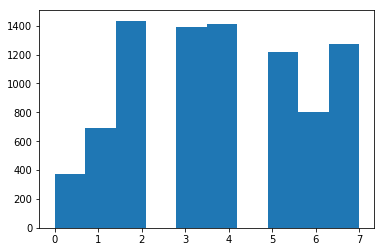

In [11]:
plt.hist(data['tvtot'])

In [12]:
TV = data[data['year']==6]
men = TV[TV['gndr']==1.0]
women = TV[TV['gndr']==2.0]

print("Average TV men:", men['tvtot'].mean())
print("Average TV women:", women['tvtot'].mean())
print(stats.ttest_ind(men['tvtot'], women['tvtot']))

Average TV men: 3.901850489265741
Average TV women: 3.944277159999256
Ttest_indResult(statistic=-0.6899854275080107, pvalue=0.49024063084629854)


For 2012, on average women reoported watching more TV than men. However, the differences were not statistically significant. 

### 4. Who was more likely to believe people were fair in 2012, people living with a partner or people living alone?

(array([ 162.,  112.,  303.,  576.,  617., 1611., 1075., 1822., 1629.,
         687.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <a list of 10 Patch objects>)

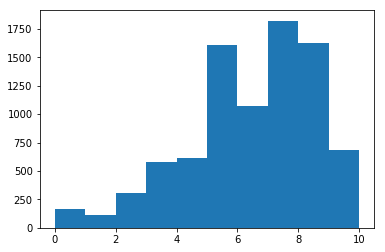

In [13]:
plt.hist(data['pplfair'])

In [14]:
fair = data[data['year']==6]
partner = fair[fair['partner']==1.0]
alone = fair[fair['partner']==2.0]

print("Average partner:", partner['pplfair'].mean())
print("Average alone:", alone['pplfair'].mean())
print(stats.ttest_ind(partner['pplfair'], alone['pplfair']))

Average partner: 6.080425046784697
Average alone: 5.857698728668892
Ttest_indResult(statistic=3.3196342169381756, pvalue=0.0009088839089194009)


People living alone felt that people were less fair on average and the results were statistically significant. 

### 5. Pick three or four of the countries in the sample and compare how often people met socially in 2014. Are there differences, and if so, which countries stand out?

Germany: 4.428571428571429
Spain: 5.260004226275035
Sweden: 5.426211453744493


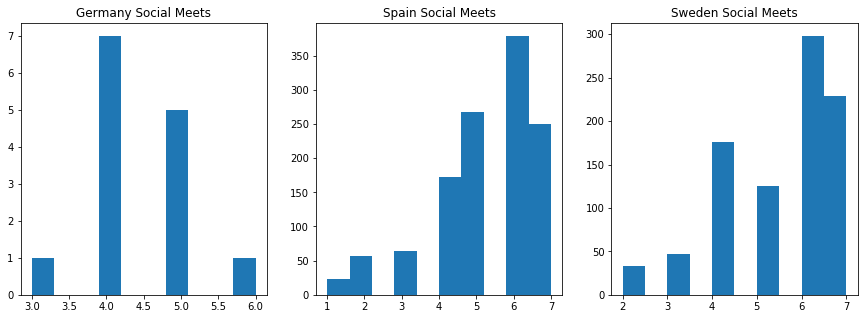

In [15]:
print("Germany:", DE7['sclmeet'].mean())
print("Spain:", ES7['sclmeet'].mean())
print("Sweden:", SE7['sclmeet'].mean())

#look at target variable distribution
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.hist(DE7['sclmeet'])
plt.title("Germany Social Meets")

plt.subplot(1, 3, 2)
plt.hist(ES7['sclmeet'])
plt.title("Spain Social Meets")

plt.subplot(1, 3, 3)
plt.hist(SE7['sclmeet'])
plt.title("Sweden Social Meets")

plt.show()

In [20]:
print("Germany vs Spain:", stats.ttest_ind(ES7['sclmeet'], DE7['sclmeet']))
print("Germany vs Sweden:", stats.ttest_ind(SE7['sclmeet'], DE7['sclmeet']))
print("Sweden vs Spain:", stats.ttest_ind(ES7['sclmeet'], SE7['sclmeet']))

Germany vs Spain: Ttest_indResult(statistic=2.117253722830867, pvalue=0.03443940370040571)
Germany vs Sweden: Ttest_indResult(statistic=2.7112078703542792, pvalue=0.006828774243218391)
Sweden vs Spain: Ttest_indResult(statistic=-2.653510849691308, pvalue=0.008025436266698395)


There was a statistically significant difference between all three countries in terms of how often people meet socially. This was especially true when comparing Germany to Sweden. It appears that people in Sweden meet much more frequently than people in Germany.

### 6. Pick three or four of the countries in the sample and compare how often people took part in social activities, relative to others their age, in 2014. Are there differences, and if so, which countries stand out?

Germany: 2.7142857142857144
Spain: 2.6199260947577705
Sweden: 2.8788499611298266


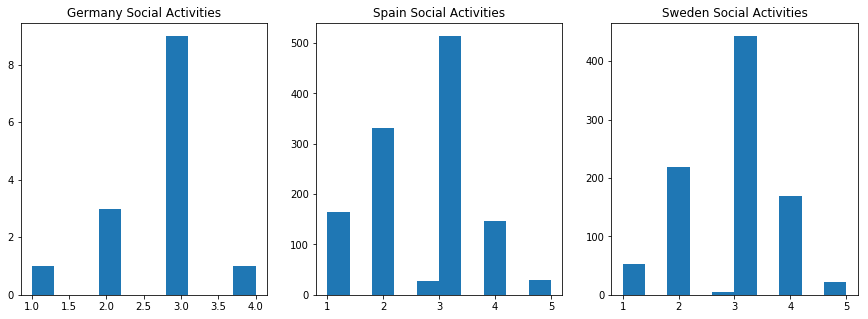

In [17]:
print("Germany:", DE7['sclact'].mean())
print("Spain:", ES7['sclact'].mean())
print("Sweden:", SE7['sclact'].mean())

#look at target variable distribution
plt.figure(figsize = (15, 5))

plt.subplot(1, 3, 1)
plt.hist(DE7['sclact'])
plt.title("Germany Social Activities")

plt.subplot(1, 3, 2)
plt.hist(ES7['sclact'])
plt.title("Spain Social Activities")

plt.subplot(1, 3, 3)
plt.hist(SE7['sclact'])
plt.title("Sweden Social Activities")

plt.show()

In [18]:
print("Germany vs Spain:", stats.ttest_ind(ES7['sclact'], DE7['sclact']))
print("Germany vs Sweden:", stats.ttest_ind(SE7['sclact'], DE7['sclact']))
print("Sweden vs Spain:", stats.ttest_ind(ES7['sclact'], SE7['sclact']))

Germany vs Spain: Ttest_indResult(statistic=-0.3732781905877244, pvalue=0.7090059903476165)
Germany vs Sweden: Ttest_indResult(statistic=0.7124368955742764, pvalue=0.4763749125793194)
Sweden vs Spain: Ttest_indResult(statistic=-6.499211288703283, pvalue=1.0036109660751136e-10)


There didn't appear to be much of a difference between the three countries and only the difference between Sweden and Spain reached signficance. 